## Import Data

In [41]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import pickle

In [56]:
train_data = pd.read_csv('data_training_80_ori.csv',)
test_data = pd.read_csv('data_testing_20_ori.csv',)
train_data

,musicId,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,arousal(mean),valence(mean)
0,761,0.616053,0.604560,0.559233,0.540098,0.709121,0.718126,0.393073,0.400826,0.446338,...,0.833811,0.547241,0.393994,0.479771,0.674610,0.605014,0.614467,0.916496,0.7750,0.7875
1,639,0.794242,0.589957,0.288092,0.688563,0.441708,0.713893,0.444084,0.364614,0.654513,...,0.710096,0.576951,0.633024,0.627542,0.768502,0.611495,0.575073,0.719249,0.7750,0.6875
2,829,0.825566,0.574038,0.217420,0.618517,0.481015,0.578023,0.409210,0.500671,0.714033,...,0.803696,0.751150,0.782233,0.840642,0.833974,0.886550,0.751148,0.808010,0.8000,0.8125
3,868,0.757982,0.865616,0.424191,0.410256,0.544787,0.392351,0.216152,0.306031,0.355628,...,0.522153,0.482740,0.381322,0.677759,0.939545,0.623434,0.609405,0.442303,0.7000,0.6250
4,367,0.696750,0.425273,0.336051,0.606724,0.367185,0.602683,0.249014,0.301480,0.713819,...,0.570637,0.465296,0.725502,0.633858,0.445502,0.421265,0.881939,0.698951,0.6125,0.3125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,746,0.737220,0.633805,0.452186,0.670457,0.484511,0.679158,0.348643,0.412060,0.631808,...,0.816022,0.591299,0.503475,0.510930,0.726217,0.726075,0.597025,0.691644,0.6625,0.7875
610,133,0.774916,0.554481,0.333906,0.629899,0.443043,0.584161,0.304563,0.370962,0.592369,...,0.542924,0.711417,0.485588,0.476990,0.412289,0.597783,0.780925,0.545370,0.7750,0.7375
611,165,0.657012,0.591013,0.278153,0.504635,0.450790,0.383903,0.243563,0.336100,0.452616,...,0.343788,0.316998,0.266393,0.715885,0.441413,0.367062,0.592969,0.349821,0.7375,0.6750
612,882,0.987652,0.677162,0.150149,0.733944,0.315658,0.754086,0.109835,0.242889,0.757227,...,0.732214,0.800467,0.724116,0.754471,0.913387,0.620660,0.584234,0.558947,0.8500,0.6000


In [57]:
from scipy import stats
stats.ttest_ind(train_data['arousal(mean)'], train_data['valence(mean)'])

Ttest_indResult(statistic=2.263117761856072, pvalue=0.02380271764858544)

In [27]:
train_data = np.array(train_data)
test_data = np.array(test_data)
#the number of columns
len_data = np.size(train_data,axis=1)
train_data

array([[7.61000000e+02, 6.16053240e-01, 6.04560001e-01, ...,
        9.16496297e-01, 7.75000000e-01, 7.87500000e-01],
       [6.39000000e+02, 7.94241879e-01, 5.89956756e-01, ...,
        7.19249015e-01, 7.75000000e-01, 6.87500000e-01],
       [8.29000000e+02, 8.25566026e-01, 5.74038247e-01, ...,
        8.08009512e-01, 8.00000000e-01, 8.12500000e-01],
       ...,
       [1.65000000e+02, 6.57011864e-01, 5.91012990e-01, ...,
        3.49821424e-01, 7.37500000e-01, 6.75000000e-01],
       [8.82000000e+02, 9.87651951e-01, 6.77162397e-01, ...,
        5.58947433e-01, 8.50000000e-01, 6.00000000e-01],
       [4.50000000e+02, 9.19789428e-01, 6.86858473e-01, ...,
        6.27218925e-01, 7.50000000e-01, 7.62500000e-01]])

In [28]:
#separate musicId, features, arousal(mean), valence(mean) in training data
musicId_train = np.int_(train_data[:,0:1])
features_train = train_data[:,1:len_data-2]
number_of_features = np.size(features_train[0],axis=0)
arousal_mean_train = train_data[:,len_data-2]
valence_mean_train = train_data[:,len_data-1]

In [29]:
musicId_train[0]

array([761])

In [30]:
#separate musicId, features, arousal(mean), valence(mean) in testing data
musicId_test = np.int_(test_data[:,0:1])
features_test = test_data[:,1:len_data-2]
number_of_features = np.size(features_test[0],axis=0)
arousal_mean_test = test_data[:,len_data-2]
valence_mean_test = test_data[:,len_data-1]

In [31]:
arousal_mean_train[0]

0.775

In [32]:
valence_mean_train[0]

0.7875

## Regression

#### Linear Regression for Multioutput Regression

In [33]:
X = features_train
y = train_data[:,len_data-2:len_data]
linear_model = LinearRegression()
linear_model.fit(X, y)
ypred_linear = linear_model.predict(features_train)
# print(ypred_linear)

In [34]:
yactual_train = train_data[:,len_data-2:len_data]

#### k-Nearest Neighbors for Multioutput Regression

In [35]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X, y)
ypred_knn = knn_model.predict(features_train)

#### Decision Tree for Multioutput Regression

In [36]:
dectree_model = DecisionTreeRegressor()
dectree_model.fit(X, y)
ypred_dectree = dectree_model.predict(features_train)

## Evaluating

In [37]:
linear_mse = mean_squared_error(yactual_train, ypred_linear)
knn_mse = mean_squared_error(yactual_train, ypred_knn)
dectree_mse = mean_squared_error(yactual_train, ypred_dectree)
linear_rmse = sqrt(linear_mse)
knn_rmse = sqrt(knn_mse)
dectree_rmse = sqrt(dectree_mse)
print("RMSE linear regression: "+str(linear_rmse))
print("RMSE knn regression: "+str(knn_rmse))
print("RMSE decision tree regression: "+str(dectree_rmse))

RMSE linear regression: 0.10856962005958477
RMSE knn regression: 0.10762606169818596
RMSE decision tree regression: 0.007819113650127848


In [42]:
r2_linear_train = r2_score(yactual_train,ypred_linear)
r2_knn_train = r2_score(yactual_train, ypred_knn)
r2_dectree_train = r2_score(yactual_train, ypred_dectree)
print("R2 linear regression: "+str(r2_linear_train))
print("R2 knn regression: "+str(r2_knn_train))
print("R2 decision tree regression: "+str(r2_dectree_train))

R2 linear regression: 0.6064250252339554
R2 knn regression: 0.61630911137979
R2 decision tree regression: 0.9978561983829146


In [43]:
ytrain_pred = pd.DataFrame(yactual_train)
ytrain_pred["pred_lin_aro(mean)"]=ypred_linear[:,0]
ytrain_pred["pred_lin_val(mean)"]=ypred_linear[:,1]
ytrain_pred["pred_knn_aro(mean)"]=ypred_knn[:,0]
ytrain_pred["pred_knn_val(mean)"]=ypred_knn[:,1]
ytrain_pred["pred_dectree_aro(mean)"]=ypred_dectree[:,0]
ytrain_pred["pred_dectree_val(mean)"]=ypred_dectree[:,1]
ytrain_pred

,0,1,pred_lin_aro(mean),pred_lin_val(mean),pred_knn_aro(mean),pred_knn_val(mean),pred_dectree_aro(mean),pred_dectree_val(mean)
0,0.7750,0.7875,0.597125,0.678138,0.6725,0.6675,0.7750,0.7875
1,0.7750,0.6875,0.700034,0.633720,0.7000,0.6400,0.7750,0.6875
2,0.8000,0.8125,0.771714,0.681205,0.7525,0.6900,0.8000,0.8125
3,0.7000,0.6250,0.603135,0.649625,0.6625,0.6325,0.7000,0.6250
4,0.6125,0.3125,0.669227,0.481286,0.7025,0.5800,0.6125,0.3125
...,...,...,...,...,...,...,...,...
609,0.6625,0.7875,0.668030,0.672659,0.7150,0.7325,0.6625,0.7875
610,0.7750,0.7375,0.752547,0.710454,0.7025,0.7150,0.7750,0.7375
611,0.7375,0.6750,0.609821,0.587145,0.6800,0.6725,0.7375,0.6750
612,0.8500,0.6000,0.912575,0.819307,0.8925,0.7375,0.8500,0.6000


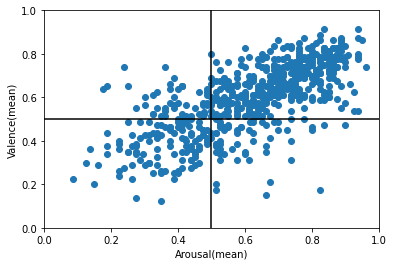

In [15]:
#cek persebaran data
plt.xlim(0,1)
plt.ylim(0,1)
plt.axhline(y=0.5, color='black', linestyle='-')
plt.axvline(x=0.5, color='black', linestyle='-')
plt.xlabel("Arousal(mean)")
plt.ylabel("Valence(mean)")
plt.scatter(yactual_train[:,0],yactual_train[:,1])

plt.show()

### save model

In [17]:
pickle.dump(linear_model, open('linear_model_mean_music.sav', 'wb'))
pickle.dump(knn_model, open('knn_model_mean_music.sav', 'wb'))
pickle.dump(dectree_model, open('dectree_model_mean_music.sav', 'wb'))

### load model

In [44]:
yactual_test = test_data[:,len_data-2:len_data]

In [45]:
loaded_model_linear = pickle.load(open('linear_model_mean_music.sav', 'rb'))
loaded_model_knn = pickle.load(open('knn_model_mean_music.sav', 'rb'))
loaded_model_dectree = pickle.load(open('dectree_model_mean_music.sav', 'rb'))
# result = loaded_model_linear.score(features_test,yactual_test)
# print(result)

In [46]:
yactual_test

array([[0.6625    , 0.65      ],
       [0.275     , 0.35      ],
       [0.5375    , 0.8375    ],
       [0.575     , 0.625     ],
       [0.925     , 0.8625    ],
       [0.4       , 0.675     ],
       [0.5875    , 0.6875    ],
       [0.9125    , 0.6125    ],
       [0.6625    , 0.55      ],
       [0.6875    , 0.725     ],
       [0.7375    , 0.725     ],
       [0.8125    , 0.7375    ],
       [0.825     , 0.6875    ],
       [0.675     , 0.575     ],
       [0.3375    , 0.3625    ],
       [0.725     , 0.825     ],
       [0.8875    , 0.775     ],
       [0.3625    , 0.5       ],
       [0.6625    , 0.6       ],
       [0.55      , 0.475     ],
       [0.6       , 0.725     ],
       [0.85      , 0.75      ],
       [0.975     , 0.825     ],
       [0.5625    , 0.5875    ],
       [0.4       , 0.4625    ],
       [0.95      , 0.8125    ],
       [0.3875    , 0.375     ],
       [0.5875    , 0.525     ],
       [0.2625    , 0.2875    ],
       [0.2625    , 0.25      ],
       [0.

In [47]:
ypred_test_linear = loaded_model_linear.predict(features_test)
ypred_test_knn = loaded_model_knn.predict(features_test)
ypred_test_dectree = loaded_model_dectree.predict(features_test)

In [48]:
linear_mse = mean_squared_error(yactual_test, ypred_test_linear)
knn_mse = mean_squared_error(yactual_test, ypred_test_knn)
dectree_mse = mean_squared_error(yactual_test, ypred_test_dectree)
linear_rmse = sqrt(linear_mse)
knn_rmse = sqrt(knn_mse)
dectree_rmse = sqrt(dectree_mse)
print("RMSE linear regression: "+str(linear_rmse))
print("RMSE knn regression: "+str(knn_rmse))
print("RMSE decision tree regression: "+str(dectree_rmse))

RMSE linear regression: 0.13315530260077302
RMSE knn regression: 0.13917546502849756
RMSE decision tree regression: 0.15812598964705382


In [49]:
r2_linear_test = r2_score(yactual_test,ypred_test_linear)
r2_knn_test = r2_score(yactual_test, ypred_test_knn)
r2_dectree_test = r2_score(yactual_test, ypred_test_dectree)
print("R2 linear regression: "+str(r2_linear_test))
print("R2 knn regression: "+str(r2_knn_test))
print("R2 decision tree regression: "+str(r2_dectree_test))

R2 linear regression: 0.35683572539761993
R2 knn regression: 0.29822853540852173
R2 decision tree regression: 0.08951061761014883


In [23]:
ytest_pred = pd.DataFrame(yactual_test)
ytest_pred["pred_lin_aro(mean)"]=ypred_test_linear[:,0]
ytest_pred["pred_lin_val(mean)"]=ypred_test_linear[:,1]
ytest_pred["pred_knn_aro(mean)"]=ypred_test_knn[:,0]
ytest_pred["pred_knn_val(mean)"]=ypred_test_knn[:,1]
ytest_pred["pred_dectree_aro(mean)"]=ypred_test_dectree[:,0]
ytest_pred["pred_dectree_val(mean)"]=ypred_test_dectree[:,1]
ytest_pred

,0,1,pred_lin_aro(mean),pred_lin_val(mean),pred_knn_aro(mean),pred_knn_val(mean),pred_dectree_aro(mean),pred_dectree_val(mean)
0,0.662500,0.650000,0.734299,0.739228,0.7350,0.7450,0.8125,0.7250
1,0.275000,0.350000,0.324653,0.360619,0.4875,0.5400,0.5125,0.3750
2,0.537500,0.837500,0.660297,0.585030,0.7550,0.6975,0.7125,0.6125
3,0.575000,0.625000,0.687614,0.643574,0.7625,0.7225,0.8625,0.7875
4,0.925000,0.862500,0.737581,0.714289,0.7775,0.7750,0.8875,0.8625
...,...,...,...,...,...,...,...,...
148,0.462500,0.300000,0.376544,0.474215,0.3800,0.4675,0.4250,0.3750
149,0.637500,0.725000,0.726367,0.673595,0.7350,0.7700,0.7375,0.6625
150,0.511364,0.386364,0.595782,0.589687,0.5675,0.5850,0.5500,0.5625
151,0.737500,0.525000,0.648025,0.670771,0.8000,0.7325,0.7875,0.7125


### Scatter plot of data testing

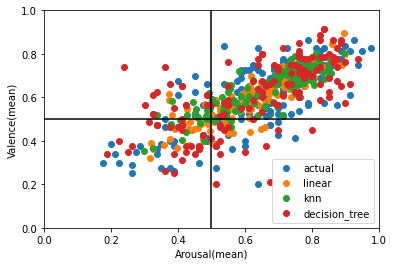

In [24]:
import matplotlib.pyplot as plt
plt.xlim(0,1)
plt.ylim(0,1)
plt.axhline(y=0.5, color='black', linestyle='-')
plt.axvline(x=0.5, color='black', linestyle='-')
plt.xlabel("Arousal(mean)")
plt.ylabel("Valence(mean)")
plt.scatter(yactual_test[:,0],yactual_test[:,1],label="actual")
plt.scatter(ypred_test_linear[:,0],ypred_test_linear[:,1],label="linear")
plt.scatter(ypred_test_knn[:,0],ypred_test_knn[:,1],label="knn")
plt.scatter(ypred_test_dectree[:,0],ypred_test_dectree[:,1],label="decision_tree")
plt.legend()
plt.show()